In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
from collections import Counter, defaultdict

In [2]:
data_jobkorea = pd.read_csv('./outputs/jobkorea.csv')
data_saramin = pd.read_csv('./outputs/saramin.csv')

total_df = pd.concat([data_jobkorea, data_saramin])
tech_details = total_df['기술 세부 사항']

split_words = tech_details.apply(lambda x: x.replace(',', ' ').split())
all_split_words = sum(split_words.tolist(), []) + sum(split_words.tolist(), [])

split_word_count = Counter(all_split_words)

In [3]:
synonyms = {
    'BigData': '빅데이터',
    'Data Analyst' : '데이터분석가',
    'Data Engineer' : '데이터엔지니어',
    'Speech Recognition' : '음성인식',
    'Android': '안드로이드',
    'C언어': 'C',
    'C++': 'C++',
    'C#': 'C#',
    'Javascript' : 'JavaScript',
    'DataMining' : '데이터마이닝',
    '모바일App' : '모바일앱개발',
    '제어·설계' : '제어설계',
    '자동차' : '자율주행',
    '로봇설계' : '로봇엔지니어',
    '머신비전' : '컴퓨터비전',
    '이미지프로세싱' : '영상처리',
    'NLP(자연어처리)' : '자연어처리(NLP)'
}

In [4]:
def normalize_technologies(tech_details):
    words = tech_details.replace(',', ' ').split()
    normalized_words = [synonyms.get(word, word) for word in words]
    return ' '.join(normalized_words)

total_df['기술 세부 사항'] = total_df['기술 세부 사항'].apply(normalize_technologies)

In [5]:
# for word in split_word_count.most_common():
#     print(word)

In [6]:
IGNORE = [
    '딥러닝',
    '머신러닝',
    '인공지능',
    '모델링',
]

CV = [
    '이미지프로세싱',
    '컴퓨터비전',
    '영상처리',
    'C++',
    'C#',
    'C언어',
    '.NET',
    'OpenCV',
    '3D설계',
    '정밀광학',
    '머신비전',
]

NLP = [
    '자연어처리(NLP)',
    'NLP(자연어처리)',
    '챗봇',
    '음성인식',
    'NLU(자연어이해)',
    'LLM',
    'ChatGPT',
]

DATA_ENGINEER = [
    '빅데이터',
    '데이터분석가',
    '데이터엔지니어',
    '데이터분석가',
    '데이터마이닝',
    '데이터시각화',
    'BigData',
    '데이터라벨링',
    '데이터관리',
    '데이터레이크',
    '데이터파이프라인',
    'DataMining',
    'DataWarehouse',
]

BACKEND = [
    '백엔드/서버개발',
    '서버관리',
    '서버구축',
    '네트워크',
    'DBMS',
    '클라우드개발자',
    'AWS',
    '클라우드아키텍트',
    'DB튜닝',
    'API',
    'MySQL',
    'SQL',
    'Azure',
    'RDB/NoSQL',
    'RDBMS',
    'Oracle',
    'Django',
    'Spring',
    'Kubernetes',
    'Docker',
]

FRONT = [
    '웹개발',
    '프론트엔드',
    '반응형웹',
    '웹마스터',
    '웹표준·웹접근성',
    'Javascript',
    'CSS',
    'React',
    'JavaScript',
]

MOBILE = [
    '모바일앱개발',
    '앱개발',
    '안드로이드',
    'Android',
    '모바일App',
    'iOS',
    '스마트폰',
]

BLOCK_CHAIN = ['블록체인']

FINANCE = [
    '핀테크',
    '암호화폐',
]

SYSTEM = [
    '임베디드',
    '회로설계',
    'Linux',
    'IoT',
    '제어·설계',
    '제어설계',
    '자동차',
    '자율주행',
    '로봇설계',
    '로봇엔지니어',
    '리눅스',
]

SECURITY =[
    '정보보안',
    '보안관제',
    '보안컨설팅',
    '보안소프트웨어',
    '네트워크보안',
]

METAVERS = [
    '증강현실',
    '가상현실',
    '메타버스',
]

In [7]:
def determine_field(words):
    fields = []
    for word in words:
        if word in IGNORE:
            continue
        elif word in CV:
            fields.append("컴퓨터 비전")
        elif word in NLP:
            fields.append("자연어 처리")
        elif word in DATA_ENGINEER:
            fields.append("데이터 엔지니어링")
        elif word in BACKEND:
            fields.append("백엔드 개발")
        elif word in FRONT:
            fields.append("프론트엔드 개발")
        elif word in MOBILE:
            fields.append("모바일 개발")
        elif word in BLOCK_CHAIN:
            fields.append("블록체인")
        elif word in FINANCE:
            fields.append("금융")
        elif word in SYSTEM:
            fields.append("시스템 개발")
        elif word in SECURITY:
            fields.append("보안")
        elif word in METAVERS:
            fields.append("메타버스")
    
    # 모든 단어 검사 후 분야가 없으면 Unknown 추가
    if not fields:
        fields.append('Unknown')
    
    return ", ".join(sorted(set(fields)))


In [8]:
total_df['주요분야'] = split_words.apply(determine_field)
print(total_df.head(10))

   Unnamed: 0        회사명                                 채용공고 제목  \
0           0  한국산업기술시험원     2024년 2분기 1차수 한국산업기술시험원 위촉 계약직 공개모집   
1           1   스마트라이프텍㈜  [스마트라이프텍㈜] 2024년 상반기 각 부문별 신입 / 경력직 채용   
2           2     랜드소프트㈜            랜드소프트㈜ 2024년도 PM 및 개발자 경력 채용   
3           3    나이스평가정보                         기술평가 전문인력 모집 공고   
4           4      ㈜이엠디넷              [LG유플러스 마곡] 디바이스 QA 정규직 채용   
5           5    ㈜BNK시스템                        2024년도 경력직원 채용공고   
6           6    ㈜티맥스소프트                  [TmaxSoft/연구소] AI연구파트장   
7           7  ㈜한국무역정보통신                    2024년 신규(신입/경력)직원 모집   
8           8  ㈜DYB최선어학원              [직영] 24년 신학기 각 부문 STAFF 모집   
9           9       브이아이               머신비전 S/W개발 모집 공고 (신입, 경력)   

                            채용공고 세부 사항  \
0              신입·경력,학력무관,서울 구로구 외,계약직   
1           신입·경력1년↑,학력무관,서울 금천구 외,정규직   
2              경력3년↑,학력무관,서울 서초구 외,정규직   
3                   경력,대졸↑,서울 영등포구,계약직   
4          신입·경력1년↑,고졸↑,서울 강서구 외,정규직 외   

In [9]:
def count_technologies(row):
    words = row['기술 세부 사항'].replace(',', ' ').split()
    field_technologies = []

    field_lists = {
        "컴퓨터 비전": CV,
        "자연어 처리": NLP,
        "데이터 엔지니어링": DATA_ENGINEER,
        "백엔드 개발": BACKEND,
        "프론트엔드 개발": FRONT,
        "모바일 개발": MOBILE,
        "블록체인": BLOCK_CHAIN,
        "금융": FINANCE,
        "시스템 개발": SYSTEM,
        "보안": SECURITY,
        "메타버스": METAVERS,
        "Unknown": []
    }

    field_counts = {field: Counter([word for word in words if word in field_lists[field]]) for field in row['주요분야'].split(", ")}
    for field, counter in field_counts.items():
        for tech, count in counter.items():
            field_technologies.append(f"{tech} : {count}")
    
    return ", ".join(field_technologies)

In [10]:
total_df['연관 분야'] = total_df.apply(count_technologies, axis=1)
print(total_df.head(10))

   Unnamed: 0        회사명                                 채용공고 제목  \
0           0  한국산업기술시험원     2024년 2분기 1차수 한국산업기술시험원 위촉 계약직 공개모집   
1           1   스마트라이프텍㈜  [스마트라이프텍㈜] 2024년 상반기 각 부문별 신입 / 경력직 채용   
2           2     랜드소프트㈜            랜드소프트㈜ 2024년도 PM 및 개발자 경력 채용   
3           3    나이스평가정보                         기술평가 전문인력 모집 공고   
4           4      ㈜이엠디넷              [LG유플러스 마곡] 디바이스 QA 정규직 채용   
5           5    ㈜BNK시스템                        2024년도 경력직원 채용공고   
6           6    ㈜티맥스소프트                  [TmaxSoft/연구소] AI연구파트장   
7           7  ㈜한국무역정보통신                    2024년 신규(신입/경력)직원 모집   
8           8  ㈜DYB최선어학원              [직영] 24년 신학기 각 부문 STAFF 모집   
9           9       브이아이               머신비전 S/W개발 모집 공고 (신입, 경력)   

                            채용공고 세부 사항  \
0              신입·경력,학력무관,서울 구로구 외,계약직   
1           신입·경력1년↑,학력무관,서울 금천구 외,정규직   
2              경력3년↑,학력무관,서울 서초구 외,정규직   
3                   경력,대졸↑,서울 영등포구,계약직   
4          신입·경력1년↑,고졸↑,서울 강서구 외,정규직 외   

In [11]:
total_df.to_csv('test.csv', index=False)

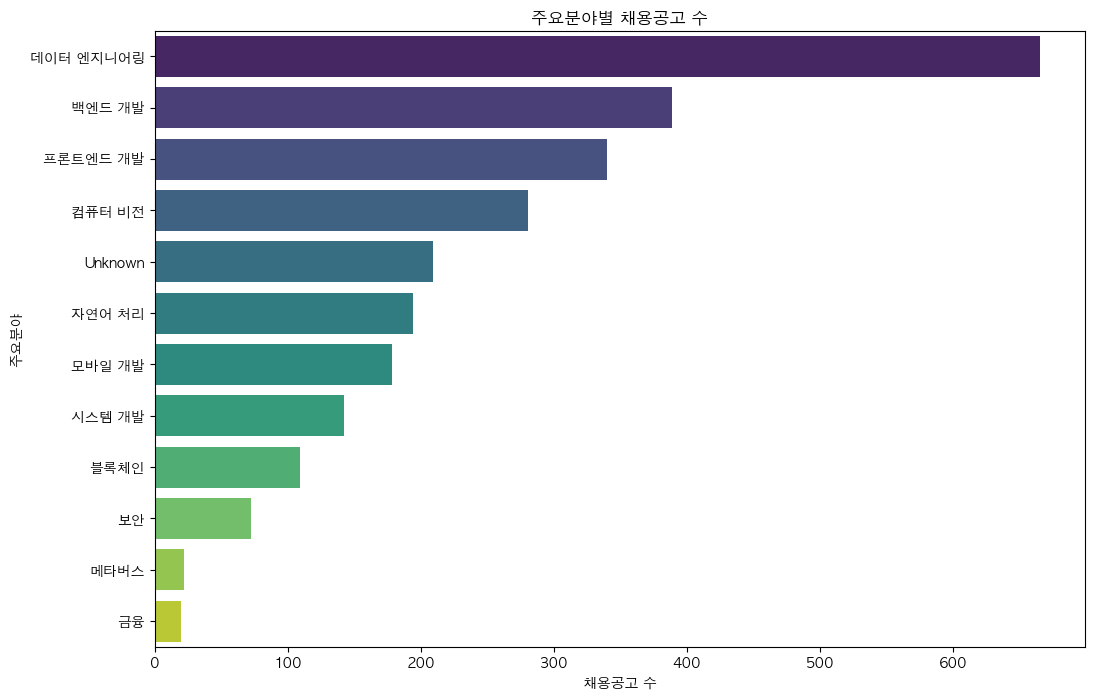

In [12]:
field_counts = pd.Series([field for sublist in total_df['주요분야'].dropna().str.split(", ") for field in sublist]).value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=field_counts.values, y=field_counts.index, palette='viridis')
plt.title('주요분야별 채용공고 수')
plt.xlabel('채용공고 수')
plt.ylabel('주요분야')
plt.show()

In [18]:
def parse_and_count_associated_fields(field_counts, counter):
    # 연관 분야는 "필드 : 숫자" 형식으로 되어 있으므로, 각 항목을 파싱
    field_counts = field_counts.split(',')
    for field_count in field_counts:
        try:
            field, count = field_count.split(':')
            counter[field.strip()] += int(count.strip())
        except ValueError:
            # 형식이 잘못된 데이터 항목에 대한 처리
            print(f"Skipping malformed entry: {field_count}")

def plot_related_fields(counter, keyword):
    # 상위 10개 연관 분야를 그래프로 그리기
    top_related_fields = counter.most_common(10)
    related_fields, related_counts = zip(*top_related_fields)
    plt.figure(figsize=(12, 8))
    plt.bar(related_fields, related_counts, color='blue')
    plt.title(f'Top 10 Related Fields with {keyword}')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.show()

Skipping malformed entry: 
Skipping malformed entry: 
Skipping malformed entry: 


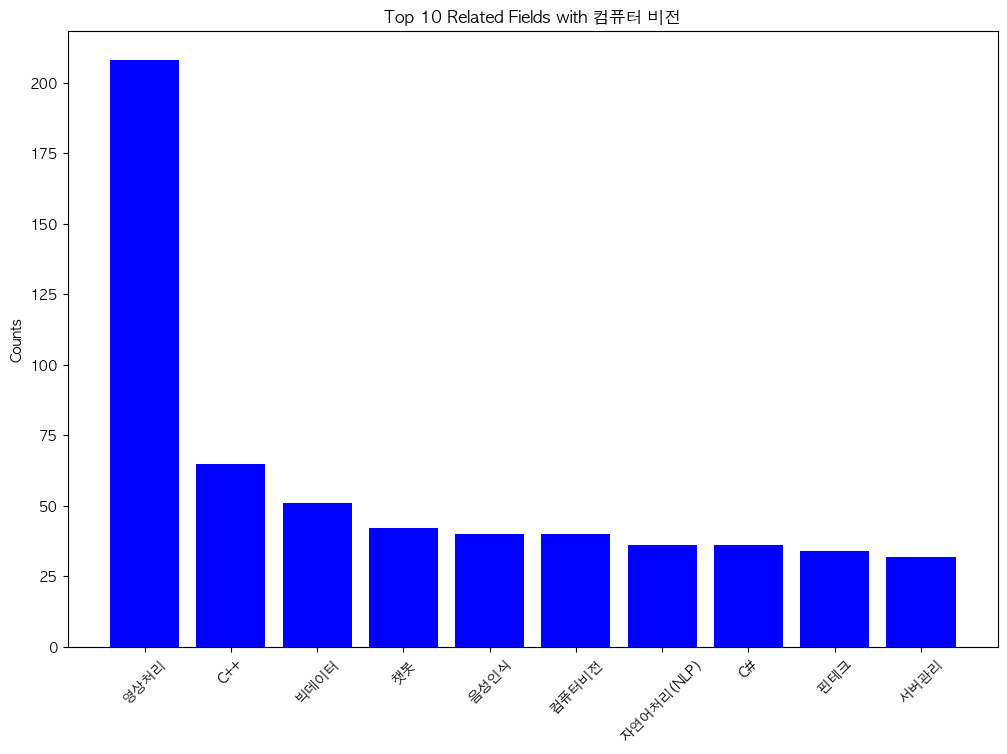

In [20]:
search_keyword = '컴퓨터 비전'
filtered_data = total_df[total_df['주요분야'].str.contains(search_keyword, na=False)]

# 연관 분야 카운트
related_field_counter = Counter()
filtered_data['연관 분야'].dropna().apply(lambda x: parse_and_count_associated_fields(x, related_field_counter))

# 결과 그래프로 표시
plot_related_fields(related_field_counter, search_keyword)